In [2]:
# import sys
# sys.path.append('../')

import numpy as np
import pandas as pd
from Hypervolume import HyperVolume
import matplotlib.pyplot as plt
from matplotlib.patches import Ellipse

font = {'size': 16}
plt.rc('font', **font)

In [3]:
# Load scores and mei
path_file = "../output/parameter_exploration_GP_MOTPE/SCORES_ZDT1_gamma_0.3_l_1.0_IT_85.csv"
ZDT1_scores = pd.read_csv(path_file, sep=',', header=0).values[:,1:]
path_file = "../output/parameter_exploration_GP_MOTPE/MEIS_ZDT1_gamma_0.3_l_1.0_IT_85.csv"
ZDT1_meis = pd.read_csv(path_file, sep=',', header=0).values[:,1:]

In [4]:
np.max(ZDT1_meis)

-0.0

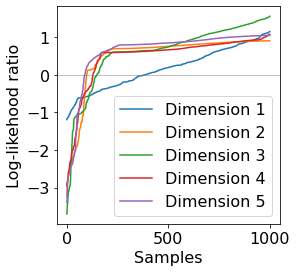

In [7]:
plt.subplots(figsize=(4,4))
for if_p in range(ZDT1_scores.shape[1]):
    plt.plot(ZDT1_scores[:, if_p], label="Dimension "+str(if_p+1))
plt.xlabel("Samples")
plt.ylabel("Log-likehood ratio")
plt.axhline(0, lw='0.5', color='grey')
plt.legend()
plt.savefig("..\output\plots\Disaggregated_scores.pdf", dpi=1200, bbox_inches='tight')

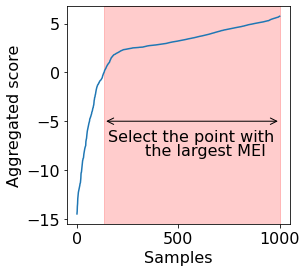

In [8]:
first_positive_index = list(map(lambda i: i > 0, np.sum(ZDT1_scores, axis=1))).index(True)

plt.subplots(figsize=(4, 4))
plt.plot(np.sum(ZDT1_scores, axis=1))
plt.axvspan(first_positive_index, ZDT1_scores.shape[0], color='red', alpha=0.2)
plt.xlabel("Samples")
plt.ylabel("Aggregated score")

plt.annotate(text='', xy=(1000,-5), xytext=(first_positive_index,-5), arrowprops=dict(arrowstyle='<->'))
plt.annotate(text='Select the point with', xy=(1000,-7), xytext=(first_positive_index+20,-7))
plt.annotate(text='the largest MEI ', xy=(1000,-8.5), xytext=(first_positive_index+200,-8.5))
plt.savefig("..\output\plots\Aggregated_scores.pdf", dpi=1200, bbox_inches='tight')